# Fundamentals of Data Science
Winter Semester 2020

## Prof. Fabio Galasso, Alessandro Flaborea and Luca Franco
<galasso@di.uniroma1.it>, <flaborea.1841969@studenti.uniroma1.it>, <franco.luca.17@gmail.com>

## Exercise 2

In Exercise 2, you will re-derive and implement logistic regression and optimize the parameters with Gradient Descent and with the Newton's method. Also, in this exercise you will re-derive and implement Gassian Discriminant Analysis.
We will use the files logistic_x.txt and logistic_y.txt. The first contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

Note that, differently from what seen in lecture, $y^{(i)}\in \{-1,1\}$.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.
Submit it by sending an email to galasso@di.uniroma1.it, flaborea.1841969@studenti.uniroma1.it and franco.luca.17@gmail.com by Wednesday November 25th, 23:59.

## Notation

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

Let's start by setting up our Python environment and importing the required libraries:


## [15 points] Question 1: Logistic Regression with Gradient Ascent

### (a) [5 points] Equations for the log likelihood, its gradient, and the gradient ascent update rule.

Write and simplify the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

Question: in order to learn the optimal $\theta$, do you need to minimize or to maximize $l(\theta)$?

################# Do not write above this line #################

### Exercise one 

\begin{align}
P(z|x^{(i)}, \theta) = {h_\theta(x^{(i)}))^{z^{(i)}}(1-h_\theta(x^{(i)}))^{1-{z^{(i)}}}}
\end{align}

Due to $h_\theta$ being Independent and Identically Distributed:

\begin{equation*}
L(\theta)= \prod_{i=1}^{m}{h_\theta(x^{(i)}))^{z^{(i)}}(1-h_\theta(x^{(i)}))^{1-{z^{(i)}}}}
\end{equation*} 

\begin{equation*}
h_\theta(x^{(i)})= \frac{1}{1 + \exp(-\theta^{T}x^{(i)})}
\end{equation*}

\begin{align}
L(\theta)= \prod_{i=1}^{m}\bigg[\frac{1}{1 + \exp(-\theta^{T}x^{(i)})}\bigg]^{z^{(i)}}
\bigg[1- \frac{1}{1 + \exp(-\theta^{T}x^{(i)})}\bigg]^{1-z^{(i)}}  
=\prod_{i=1}^{m}\bigg[\frac{1}{1 + \exp(-\theta^{T}x^{(i)})}\bigg]^{z^{(i)}}
\bigg[\frac{exp(-\theta^{T}x^{(i)})}{1 + \exp(-\theta^{T}x^{(i)})}\bigg]^{1-z^{(i)}}=
\end{align}

\begin{align}
=\prod_{i=1}^{m}\bigg[\frac{1}{1 + \exp(-\theta^{T}x^{(i)})}\bigg]^{z^{(i)}}
\bigg[\frac{exp(-\theta^{T}x^{(i)})}{1 + \exp(-\theta^{T}x^{(i)})}\bigg]
\bigg[\frac{1 + \exp(-\theta^{T}x^{(i)})}{exp(-\theta^{T}x^{(i)})}\bigg]^{z^{(i)}}=
\end{align}

\begin{align}
 =\prod_{i=1}^{m}\bigg[\frac{exp(-\theta^{T}x^{(i)})}{1 + \exp(-\theta^{T}x^{(i)})}\bigg]
 \bigg[\frac{1}{\exp(-\theta^{T}x^{(i)})}\bigg]^{z^{(i)}}
\end{align}

\begin{align}
=\prod_{i=1}^{m}\biggl(\frac{1}{1 + \exp(-\theta^{T}x^{(i)})}\biggl){(exp(-\theta^{T}x^{(i)}}))^{1-z^{(i)}}
\end{align}

### We can obtain $l_\theta$ following two ways 

***_first_*** 

\begin{align}
l(\theta) = \log[L(\theta)] = \sum_{i=1}^{m}\log \biggl[ \frac{1}{1 + \exp(-\theta^{T}x^{(i)})}\biggl] +
(1-z^{(i)})\log(exp(-\theta^{T}{x^{(i)}}))=
\end{align}

\begin{align}
\sum_{i=1}^{m} - \log(1+exp(-\theta^{T}{x^{(i)}}))-({1-z^{(i)})(\theta^{T}{x^{(i)}}})
\end{align}

\begin{align}
=\sum_{i=1}^{m}\theta^{T}{x^{(i)}}({z^{(i)}-1)} - log(1 + exp(-\theta^{T}{x^{(i)}}))
\end{align}

***_second_***

\begin{align}
l(\theta) = \log[L(\theta)] = \log\prod_{i=1}^{m}{h_\theta(x^{(i)}))^{z^{(i)}}(1-h_\theta(x^{(i)}))^{1-{z^{(i)}}}}
\end{align}

\begin{align}
l(\theta) = \sum_{i=1}^{m}z^{(i)}\log(h_\theta{x^{(i)}}) + (1-{z^{(i)}})\log(1-h_\theta{x^{(i)}}))=
\end{align}

\begin{align}
= \sum_{i=1}^{m}\log (1-h_\theta{x^{(i)}})+ {z^{(i)}}[\log(h_\theta({x^{(i)}}))-
\log(1-h_\theta({x^{(i)}}))]=
\end{align}

\begin{align}
= \sum_{i=1}^{m}\log(1-h_\theta({x^{(i)}}))+ {z^{(i)}}\log\bigg[\frac{h_\theta({x^{(i)}})}{1-h_\theta({x^{(i)}})}\bigg]=
\end{align}

\begin{align}
= \sum_{i=1}^{m}\log\bigg[1- \frac{1}{1+exp(-\theta^{T}{x^{(i)})}}\bigg]+ 
{z^{(i)}}\log\bigg[\frac{1}{exp(-\theta^{T}{x^{(i)})}}\bigg]=
\end{align}

\begin{align}
= \sum_{i=1}^{m}\log\bigg[\frac{exp(-\theta^{T}{x^{(i)}})}{1+exp(-\theta^{T}{x^{(i)}})}\bigg]+ 
{z^{(i)}}(\theta^{T}{x^{(i)}})=
\end{align}

\begin{align}
= \sum_{i=1}^{m} -\theta^{T}{x^{(i)}} -log(1+exp(-\theta^{T}{x^{(i)}}) + {z^{(i)}}[\theta^{T}{x^{(i)}}] 
\end{align}

\begin{align}
=\sum_{i=1}^{m}\theta^{T}{x^{(i)}}({z^{(i)}-1)} - log(1 + exp(-\theta^{T}{x^{(i)}}))
\end{align}

Both approaches lead to the same result

##### Since in our specific case z can take values {-1, 1}, and the above equation only holds for cases in which z takes values {0, 1} we would simply apply the following transformation of z:

\begin{align}
z^{(i)} = \frac{y^{(i)}}{2} + \frac{1}{2}
\end{align}

### Derivative of Log-Likelyhood

\begin{align}
l(\theta) = \sum_{i=1}^{m} [\theta^{T}{x^{(i)}}({z^{(i)}-1)}]
- \log (1+ exp(-\theta^{T}{x^{(i)}}))
\end{align}

Splitting up the derivatives into parts.

A.
\begin{align}
l(\theta)= \theta^{T}{x^{(i)}}({z^{(i)}-1})
\end{align}

\begin{align}
\frac{\partial l(\theta)}{\partial \theta_{j}} = {x^{(i)}_{j}}({z^{(i)}-1})
\end{align}

B. 
\begin{align}
l(\theta)= \log(1+exp({-\theta^{T}{x^{(i)}}}))
\end{align}

\begin{align}
\frac{\partial l(\theta)}{\partial \theta_{j}} = \frac{1}{(1 + exp(-{\theta^{T}{x^{(i)}}}))}
(-x^{(i)}_{j}exp({-\theta^{T}x^{(i)}}))= 
\end{align}

\begin{align}
=\frac{-x^{(i)}_{j}}{(exp({\theta^{T}{x^{(i)}}})+1)}
\end{align}

\begin{align}
\nabla l(\theta) = \sum_{i=1}^{m} \bigg[{x^{(i)}_{j}}({z^{(i)}}-1)+ \frac{{x^{(i)}_{j}}}
{1+exp({\theta^{T}x^{(i)}})}\bigg]
\end{align}

***We can show that the partial derivative of $l(\theta)$ is equal to the result observed in class:***

\begin{align}
\frac{\partial l(\theta)}{\partial \theta_j}= \sum_{i=1}^{m}\biggl[{x_j^{(i)}}({z^{(i)}}-1)+{x_j^{(i)}}
\biggl(\frac{1}{1 + exp({\theta^{T}x^{(i)}})}+1-1\biggl)\biggl]= \\
=\sum_{i=1}^{m}\biggl[{x_j^{(i)}} - {x_j^{(i)}}+ {x_j^{(i)}}{z^{(i)
}}+{x_j^{(i)}} \biggl( \frac{1}{1+exp({ \theta^{T}x^{(i)}})}-1 \biggl)\biggl]=
\end{align}

\begin{align}
=\sum_{i=1}^{m}\biggl[ {x_j^{(i)}}{z^{(i)
}}+{x_j^{(i)}} \biggl( \frac{1-1-exp({\theta^{T}x^{(i)}})}{1+exp({\theta^{T}x^{(i)}})} \biggl)\biggl]=
\end{align}

\begin{align}
=\sum_{i=1}^{m}\biggl[ {x_j^{(i)}}{z^{(i)
}}-{x_j^{(i)}} \biggl( \frac{1}{1+exp({-\theta^{T}x^{(i)}})} \biggl)\biggl]
\end{align}

#### Gradient Update Equation

\begin{align}
\theta_{( t+1)}:= \theta_{( t)}+ {\alpha}\cdot \nabla l(\theta)
\end{align}

The log-likelihood is proportional to the probability of 𝑃(y|𝑥(𝑖),𝜃) (probability of getting a target value 1 or 0 given a specific feature), which is a quantiy we want to maximize. Therefore, we look for a $ {\theta} $ that maximizes the log-likelihood.

################# Do not write below this line #################

### (b) [10 points] Implementation of logistic regression with Gradient Ascent

Code up the equations above to learn the logistic regression parameters. Consider as data the files logistic_x.txt and logistic_y.txt. The first contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

In [279]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

Let's start by loading the data into two pandas DataFrames:

In [280]:
df_x = pd.read_csv("./data/logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('./data/logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [281]:
df_y.head()

,y
0,-1
1,-1
2,-1
3,-1
4,-1


Let's get the NumPy arrays from the dataset, and add a column of 1's to $X$ to take into account the zero intercept

In [282]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values])
y = df_y["y"].values

Adjust y so that $y^{(i)}\in [0,1]$

################# Do not write above this line #################

In [283]:
y[y == -1] = 0

################# Do not write below this line #################

In [284]:
[x[:5,:],x[-5:,:]] # Plot the first and last 5 lines of x, now containing features x0 (constant=1), x1 and x2

[array([[ 1.        ,  1.3432504 , -1.3311479 ],
        [ 1.        ,  1.8205529 , -0.6346681 ],
        [ 1.        ,  0.98632067, -1.8885762 ],
        [ 1.        ,  1.9443734 , -1.635452  ],
        [ 1.        ,  0.97673352, -1.3533151 ]]),
 array([[ 1.        ,  4.7748538 ,  0.09941521],
        [ 1.        ,  5.8274854 , -0.69005848],
        [ 1.        ,  2.2894737 ,  1.9707602 ],
        [ 1.        ,  2.494152  ,  1.4152047 ],
        [ 1.        ,  2.0847953 ,  1.3567251 ]])]

In [285]:
[y[:5],y[-5:]] # Plot the first and last 5 lines of y

[array([0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1])]

Define the sigmoid function "sigmoid", the function to compute the gradient of the log likelihood  "grad_l" and the gradient ascent algorithm.

################# Do not write above this line #################

Your code here

In [178]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def log_likelihood(theta,x,y):
    theta_x=np.dot(x,theta)
    log_l=theta_x*(y-1)-np.log(1+np.exp(-theta_x))
    log_l=np.mean(log_l)
    return log_l
   
def grad_l(theta, x, y):

    grad1=np.dot(y,x)
    theta = np.array(theta)
    theta=theta[np.newaxis].T
    t=np.dot(x,theta)
    g=sigmoid(t).T
    grad2=np.dot(g,x)
    G=grad1-grad2
    return G[0]

def gradient_ascent(theta,x,y,G,alpha=0.01,iterations=100):

    m = len(y)
    log_l_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,len(theta)))
    G=G(theta,x,y)
    prod=alpha*G
    opttheta=theta+prod.T

    for i in range(iterations):
        log_l=log_likelihood(opttheta,x,y)
        log_l_history[i]=log_l
        theta_history[i]=opttheta
        G=grad_l(opttheta,x,y)
        prod=alpha*G
        opttheta+=(prod.T) 
        
    return opttheta,log_l_history,theta_history


################# Do not write below this line #################

Check your grad_l implementation:
grad_l applied to the theta_test (defined below) should provide a value for log_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.

In [162]:
target_value = -0.4250958770469834
theta_test=np.array([-2,1,2])

log_l_test  = log_likelihood(theta_test,x,y)
error_test=np.abs(log_l_test-target_value)

print("{:f}".format(error_test))

41.659396


Let's now apply the function gradient_ascent and print the final theta as well as theta_history 

In [163]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
n_iter=1000
theta_final, log_l_history, theta_history = gradient_ascent(theta0,x,y,grad_l,alpha=0.5,iterations=n_iter)
print(theta_final)
print(theta_history)

[-78.99906711  20.98908291  41.73644465]
[[ -0.25        23.83452377  27.46411597]
 [-17.62210474 -34.99184238  45.56598762]
 [  5.43334214  83.44009046  60.61944202]
 ...
 [-81.14434649  22.73798727  57.18655423]
 [-80.16218377  24.97061918  51.20849424]
 [-80.03179503  21.7793511   46.30917205]]


Let's plot the log likelihood over iterations

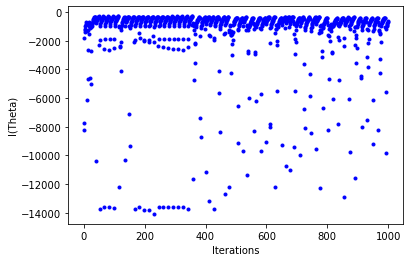

In [164]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

Plot the data and the decision boundary:

In [165]:
df_x_pl=df_x.copy()
df_y_pl=df_y.copy()
df_x_pl.insert(0, "y", df_y)
df_x_pl["y"] = pd.to_numeric(df_x_pl["y"], downcast='signed')
df_x_pl.head()

,y,x1,x2
0,0,1.343250,-1.331148
1,0,1.820553,-0.634668
2,0,0.986321,-1.888576
3,0,1.944373,-1.635452
4,0,0.976734,-1.353315


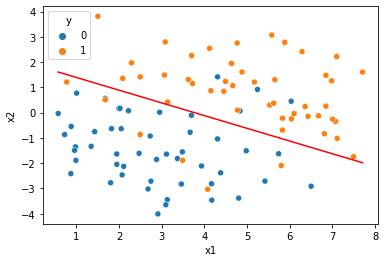

In [166]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

# Save the theta_final value for later comparisons
theta_GA = theta_final.copy()

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- what effects do the learning rate $\alpha$ and the number of iterations have on the computed $\theta$
- may you still achieve the same value if you decrease the learning rate $\alpha$ and increase the number of iterations n_iter up to an infinite number of them? Why?
- may you still achieve the same value if you increase the learning rate $\alpha$ substantially and decrease the number of iterations n_iter? Why?

Substantiate your answer with experiments and plots of the $l(\theta)$ and the decision boundary.

##### Answers

In order to answer these questions, we carry out some experiments and plot the results. In the experiments, we will compute the $\theta$ based on different values of $\alpha$ (0.5, 0.05 and 0.005) and different number of iterations (100, 1000 and 10,000).

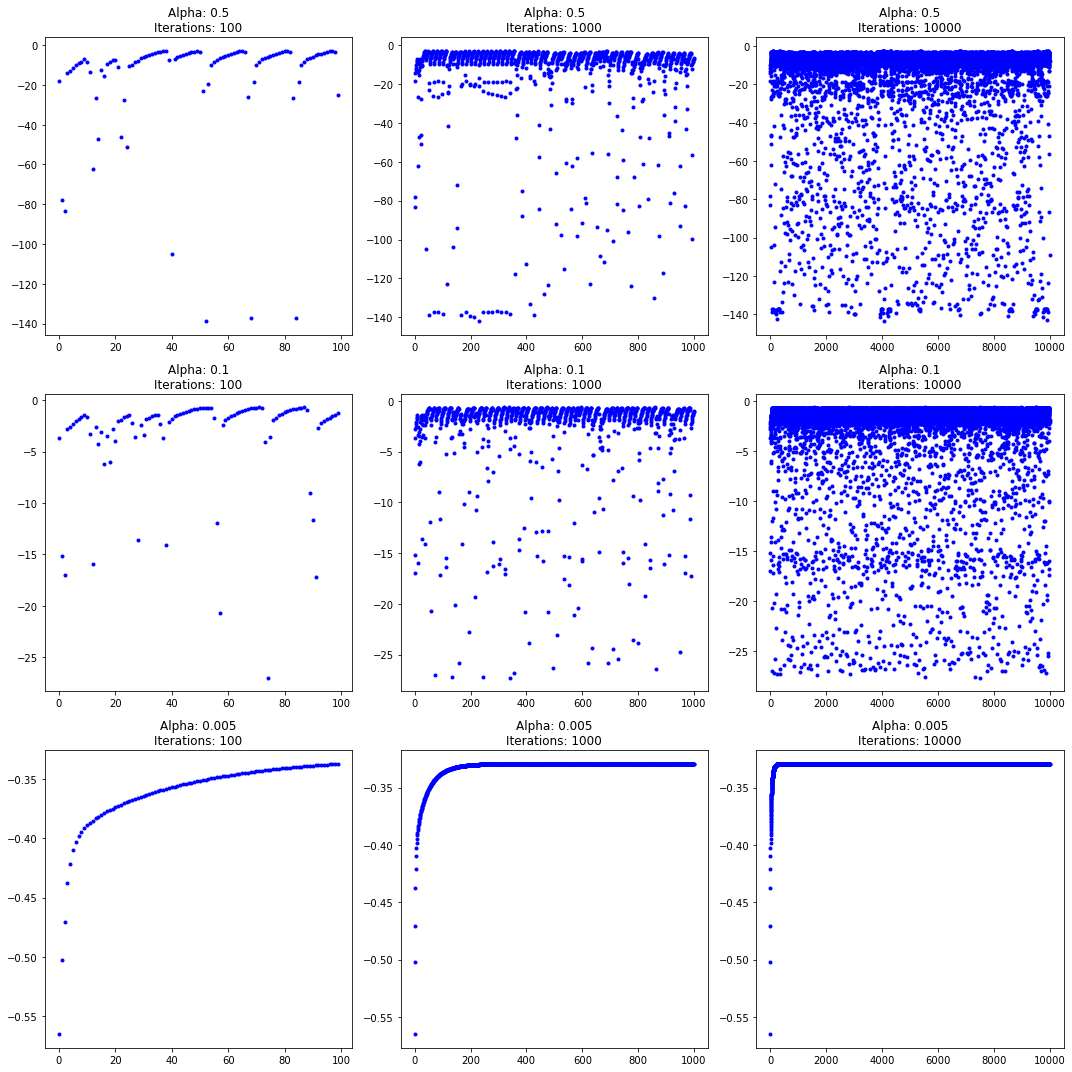

In [18]:
alphas=[.5,.1,.005]
iterations = [100, 1000, 10000]
fig, ax = plt.subplots(ncols=len(alphas), nrows=len(iterations), figsize=(15,15))
ax = ax.flatten()
for a in range(len(alphas)):
    for i in range(len(iterations)):
        theta_final, log_l_history, theta_history = gradient_ascent(theta0,x,y,grad_l,alpha=alphas[a],iterations=iterations[i])
        axes = ax[(a*3)+i]
        axes.plot(range(len(log_l_history)),log_l_history,'b.')
        axes.set_title('Alpha: ' + str(alphas[a]) + '\n' + 'Iterations: ' + str(iterations[i]))
        plt.tight_layout()
        

By observing the plots above, we can come to the conclusion that the smaller $\alpha$, the more accurate the algorithm is, therefore the better results for $l(\theta)$ we get. As we saw in class, this happens because a higher value of $\alpha$ may fail to identify the optimal value, as it bounces around the curve described by $l(\theta)$, while a smaller $\alpha$ slowly analyses this path little by little. Naturally, this guarantees finding a good value for $\theta$ but at the cost of a longer computing time, which is the reason why finding a high enough value of $\alpha$ that does not overshoot is so important. In other words, there is a loss in efficiency that comes with a lower value of $\alpha$, since more steps are required to reach the maximum. 

Moreover, we observe that for the iterations it is the better to have a bigger number of them in order to reach a better result for $l(\theta)$, although this implies a longer computational time.

Finally, by looking at the plots it appears clear that no number of iterations could ever reach the efficiency of a good $\alpha$ (that is, a very small $\alpha$). This answers the second and third questions: a very small amount of iterations (100) when combined with a low value of $\alpha$ (0.005) gives way better results for $l(\theta)$ compared to those obtained with a large number of iterations (10,000) but a greater $\alpha$ (0.5).

[-31.20643457 119.92555466  32.13387545]
[-78.99906711  20.98908291  41.73644465]
[-73.15872087  20.90935029  51.73922868]
[-14.77202148   4.11540891   8.38532188]
[-13.86766707   3.59529837   5.53060817]
[-13.95795545   4.19237061  12.72785378]
[-1.72110955  0.56519517  1.12821683]
[-2.62005616  0.76027138  1.17191325]
[-2.6205116   0.76037154  1.17194674]


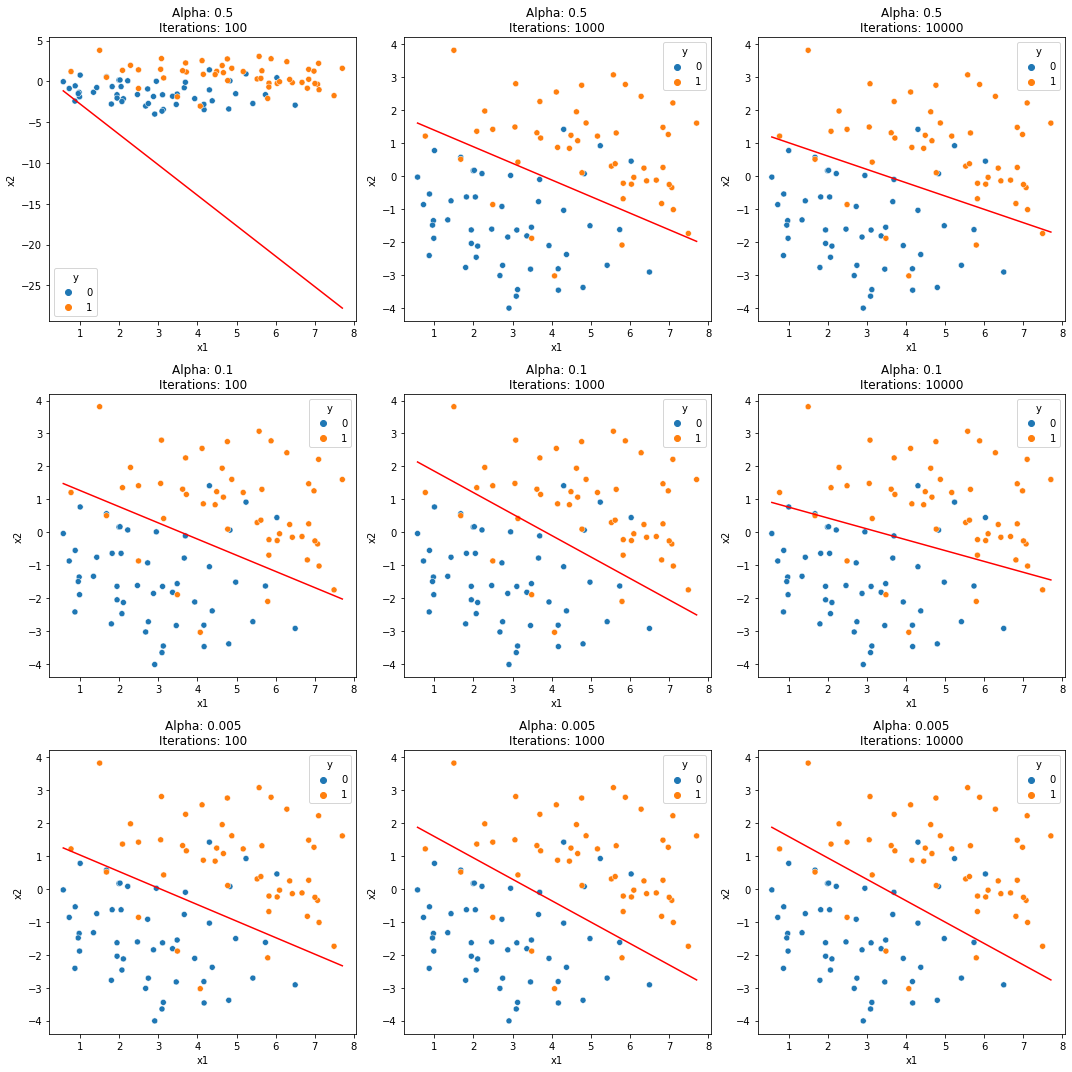

In [19]:
alphas=[.5,.1,.005]
iterations = [100, 1000, 10000]
fig, ax = plt.subplots(ncols=len(alphas), nrows=len(iterations), figsize=(15,15))
ax = ax.flatten()
for a in range(len(alphas)):
    for i in range(len(iterations)):
        theta_final, log_l_history, theta_history = gradient_ascent(theta0,x,y,grad_l,alpha=alphas[a],iterations=iterations[i])
        print(theta_final)
        x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

        # Plot raw data
        axes=ax[(a*len(iterations))+i]
        sns.scatterplot(ax = axes, x="x1", y="x2", hue="y", data=df_x_pl);

        # Plot decision boundary
        
        axes.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");
        axes.set_title('Alpha: ' + str(alphas[a]) + '\n' + 'Iterations: ' + str(iterations[i]))
        plt.tight_layout()

The same conclusions can be drawn by observing the graphs above. 

Firstly, it is clear to see that the approximation of $\theta$ for a high value of $\alpha$ (0.5) is not at all satisfactory. Such a learning rate would probably necessitate of an infinite amount of iterations, which of course is not conceivable in practice and even then the final value may not be adequate.

On the contrary, for a smaller $\alpha$ (0.05) we can distinctly observe how more iterations lead to better and better results.

Finally, for the best value of $\alpha$ we found in the last experiment (0.005) we obtain the same approximation for 1,000 and 10,000 iterations. This implies that a lower value of $\alpha$, although slower to compute, ensures we will reach the optimal theta values.

################# Do not write below this line #################


## [15 points] Question 2: Logistic Regression with the Newton's method

### (a) [5 points] Equations for the Hessian of the log likelihood

Derive the equation for the Hessian matrix $H$ of the log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall that: $H_{i,j} = \frac{\delta^2 l(\theta)}{\delta \theta_i \delta \theta_j}$

Also write the parameter update rule for the Newton's method, as a function of the Hessian and gradient of $l(\theta)$.

Question: in order to learn the optimal $\theta$, do you need to minimize or to maximize $\nabla_{\theta} l$?

################# Do not write above this line #################

### Hessian Matrix 

\begin{align}
H_{kj} = \frac{\partial^{2} l(\theta)}{\partial \theta_{k} \partial \theta_{j}}
\end{align}

\begin{align}
\frac{\partial l(\theta)}{\partial \theta_{j}} = l'(\theta)= 
\sum_{i=1}^{m}x_j^{(i)} \biggl[ z^{(i)}- \frac{1}{1+exp({ -\theta^{T} }x^{(i)})}\biggl]
\end{align}

\begin{align}
\frac{\partial^{2} l(\theta)}{\partial \theta_{j} \partial \theta_{k}}= 
\frac{\partial }{\partial \theta_{k} }\biggl[\frac{\partial l(\theta)}{\partial \theta_j} \biggl]= \sum_{i=1}^{m}x_j^{(i)}\biggl [\frac{\partial}{\partial \theta_k}(1+exp({-\theta^{T}}x^{(i)}))^{-1} \biggl] =
\end{align}

\begin{align}
\sum_{i=1}^{m} x_j^{(i)} \biggl [(1+exp({ \theta^{T}x^{(i)}}))^{-2}(x_k^{(i)})exp({-\theta^{T}{x^{(i)}})})\biggl] = \sum_{i=1}^{m}x_j^{(i)}x_k^{(i)} \biggl [-\frac{exp({-\theta^{T}}x^{(i)})}{(1+exp({{-\theta^{T}}{x^{(i)}}))^2}}\biggl]
\end{align}

### Newton's Method

\begin{align}
\theta^{( t+1)}:= \theta^{( t)}- {H}^{(-1)}\nabla_{\theta} l
\end{align}

Maximizing or minimizing the gradient of $l(\theta)$ gives the same result since we want $\nabla_{\theta} l$  to be equal 0. Therefore, in order to learn optimal $\theta$, we can maximize or minimize $\nabla_{\theta} l$.


################# Do not write below this line #################

### (b) [10 points] Implementation of logistic regression with the Newton's method

Code up the equations above to learn the logistic regression parameters. Consider as data the files logistic_x.txt and logistic_y.txt. The first contains the feature values  $x^{(i)}_1$ and $x^{(i)}_2$  for the  𝑖 -th data sample  $x^{(i)}$ . The second contains the ground truth label  $y^{(i)}$  for each corresponding data sample.

Define the Hessian function hess_l and the Newton's method function "newton":

################# Do not write above this line #################

Your code here

In [182]:
def hess_l(theta, x, y):
    hess = np.zeros((len(x[0]),len(x[0])))
    hess_j_k=0
    for j in range(len(x[0])):
        for k in range(len(x[0])):
            for i in range(len(x)):
                hess_j_k += x[i][j]*x[i][k]*((np.exp(np.dot(np.transpose(-theta),x[i]))/((1+np.exp(np.dot(np.transpose(-theta),x[i])))**2)))
            hess[j][k]= -hess_j_k 
            hess_j_k=0
    return hess


def newton(theta0, x, y, G, H, eps):
    keep=0
    llikelihood = log_likelihood(theta0, x,y)
    log_l_history = [llikelihood]
    theta_history = [theta0]
    gradient = G(theta0, x, y)
    hessian = H(theta0, x, y)
    hessian_inv = np.linalg.inv(hessian)
    product = np.dot(hessian_inv,gradient)
    theta =theta0 - product
    keep +=1
    theta_history.append(theta)
    llikelihood = log_likelihood(theta, x,y)
    log_l_history.append(llikelihood)
    while abs(log_l_history[keep]-log_l_history[keep-1]) > eps:
        keep +=1        
        gradient = G(theta, x, y)
        hessian_inv = np.linalg.inv(H(theta, x, y))
        product = np.dot(hessian_inv,gradient)
        theta = theta - product
        llikelihood = log_likelihood(theta, x,y)
        theta_history.append(theta)
        log_l_history.append(llikelihood)
    return theta, theta_history, log_l_history


################# Do not write below this line #################

Check your hess_l implementation: hess_l applied to the theta_test (defined below) should provide a value for hess_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.

In [183]:
target_value = np.array([[-0.14357024, -0.43836134,  0.18767787], \
                         [-0.43836134, -1.72295801,  0.61817001], \
                         [ 0.18767787,  0.61817001, -0.51247901]])
theta_test=np.array([-2,1,2])

hess_l_test  = hess_l(theta_test,x,y)
error_test=np.sum(np.abs(hess_l_test-target_value),axis=(0,1))

print("{:f}".format(error_test))

191.932253


Now run Newton's method to perform logistic regression:

In [184]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Newton's method
theta_final, theta_history, log_l_history = newton(theta0,x,y,grad_l,hess_l,1e-6)
print(theta_final)

[-2.62050954  0.76037096  1.17194549]


In [185]:
theta_history

[array([0., 0., 0.]),
 array([-1.50983811,  0.43509696,  0.62161752]),
 array([-2.21834632,  0.64372727,  0.95944716]),
 array([-2.55431051,  0.74137714,  1.13493588]),
 array([-2.61847133,  0.75979248,  1.1707512 ]),
 array([-2.62050954,  0.76037096,  1.17194549])]

Let's plot the log likelihood over iterations

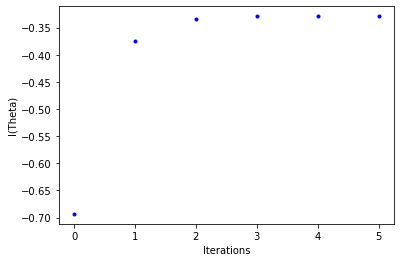

In [186]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

Plot the data and our decision boundary:

In [187]:
df_x_pl=df_x.copy()
df_y_pl=df_y.copy()
df_x_pl.insert(0, "y", df_y)
df_x_pl["y"] = pd.to_numeric(df_x_pl["y"],downcast='signed')
df_x_pl.head()

,y,x1,x2
0,0,1.343250,-1.331148
1,0,1.820553,-0.634668
2,0,0.986321,-1.888576
3,0,1.944373,-1.635452
4,0,0.976734,-1.353315


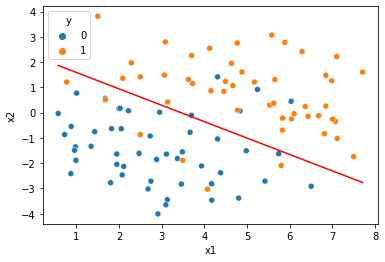

In [188]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

################# Do not write above this line #################

Write now your considerations. Discuss in particular:
- the different convergence speed of the Newton's method, compared to Gradient Ascent
- the incurred cost for the different convergence speed

In [83]:
from sklearn.metrics import confusion_matrix
import time

# Initialize theta0
theta0 = np.zeros(x.shape[1])

time_start_ga = time.clock()

# Run Gradient Ascent method
n_iter=1000
theta_final_ga, log_l_history_ga, theta_history_ga = gradient_ascent(theta0,x,y,grad_l,alpha=0.5,iterations=n_iter)

time_elapsed_ga = (time.clock() - time_start_ga)

time_start_n = time.clock()

# Run Newton's method
theta_final_n, theta_history_n, log_l_history_n = newton(theta0,x,y,grad_l,hess_l,1e-6)

time_elapsed_n = (time.clock() - time_start_n)

print("Computation time of the Gradient Ascent method is: " + str(time_elapsed_ga))
print("Computation time of the Newton's method is: " + str(time_elapsed_n))
print("The Newton's method is "+ str(time_elapsed_ga/time_elapsed_n)+ " times faster than the Gradient Ascent method.")

[-1.50983811  0.43509696  0.62161752]
[-2.21834632  0.64372727  0.95944716]
[-2.55431051  0.74137714  1.13493588]
[-2.61847133  0.75979248  1.1707512 ]
[-2.62050954  0.76037096  1.17194549]
Computation time of the Gradient Ascent method is: 0.09631220000005669
Computation time of the Newton's method is: 0.006668799999943076
The Newton's method is 14.442208493413927 times faster than the Gradient Ascent method.


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from 

In [84]:
from sklearn.metrics import confusion_matrix
y_predict_gradient_ascent = sigmoid(np.dot(x,theta_final_ga))
y_predict_gradient_ascent = (y_predict_gradient_ascent >= 0.5).astype(int)
y_predict_newton = sigmoid(np.dot(x,theta_final_n))
y_predict_newton = (y_predict_newton >= 0.5).astype(int)
cnf_matrix_1 = confusion_matrix(y, y_predict_gradient_ascent)
cnf_matrix_2 = confusion_matrix(y, y_predict_newton)
print("Confusion matrix of the Gradient Ascent method is: ")
print("------------------------------------------------------")
print(cnf_matrix_1)
print("Confusion matrix of the Newton's method is: ")
print("------------------------------------------------------")
print(cnf_matrix_2)

Confusion matrix of the Gradient Ascent method is: 
------------------------------------------------------
[[46  4]
 [ 6 43]]
Confusion matrix of the Newton's method is: 
------------------------------------------------------
[[45  5]
 [ 6 43]]


According to the computational time results for the Newton's and the Gradient Ascent methods, Newton's method is found slightly faster for our example compared to the Gradient Ascent method. These calculations are made with the same initial theta values. While Gradient Ascent stops iterating once reached the total number of iterations, Newton's method terminates finding the absolute difference between log-likelihood values less than the epsilon. Although Newton's method reaches the desired value with epsilon 1e-6 in 5 iterations, Gradient Ascent computes until 1000 iterations.
The similar computational time is due to the fact that the Newton has to compute the inverse of the hessian matrix, an NP-Problem algorithm.
From the graphs shows 'l(Theta)' and 'Iterations', it can be observed that Gradient Ascent has some dispersions in spite of Newton's has always non-decreasing approach.
From the confusion matrix point of view, cost of computation saves 0.01 higher accuracy rate.

################# Do not write below this line #################


## [7 points] Question 3: Logistic Regression with non linear boundaries

### (a) Polynomial features for logistic regression

Define new features, e.g. of 2nd and 3rd degrees, and learn a logistic regression classifier by using the new features, by using the Newton's optimization algorithm (or the gradient ascent one, if you like).

In particular, we would consider a polynomial boundary with equation:

$f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2$

We would therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking x (from the previous questions) and the new 7 features (in the order x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2). In particular create x_new_quad by additionally stacking with x the quadratic features, and x_new_cubic by additionally stacking with x the quadratic and the cubic features.

In [249]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:,1]
x2 = x[:,2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)
print(x[:5,:]) # For visualization of the first 5 values
print(x1[:5,:]) # For visualization of the first 5 values
print(x2[:5,:]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[1.3432504 ]
 [1.8205529 ]
 [0.98632067]
 [1.9443734 ]
 [0.97673352]]
[[-1.3311479]
 [-0.6346681]
 [-1.8885762]
 [-1.635452 ]
 [-1.3533151]]


################# Do not write above this line #################

Your code here

In [180]:
# Define features: x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2

x_new_quad = np.hstack([x, x1**2, x2**2, x1*x2])
x_new_cubic = np.hstack([x_new_quad, x1**3, x2**3, (x1**2)*x2, x1*x2**2])

assert x[0, 1]**2 == x_new_quad[0, 3]
assert x[0, 2]**2 == x_new_quad[0, 4]
assert x[0, 1]*x[0, 2] == x_new_quad[0, 5]
assert x[0, 1]**3 == x_new_cubic[0, 6]
assert x[0, 2]**3 == x_new_cubic[0, 7]
assert (x[0, 1]**2)*x[0,2] == x_new_cubic[0, 8]
assert x[0, 1]*x[0, 2]**2 == x_new_cubic[0, 9]

################# Do not write below this line #################

Now use the Newton's optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

Note: you may alternatively use gradient ascent, as in Question 1, if you like.

In [189]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

# Run Newton's method, in case of quadratic features
theta_final_quad, theta_history_quad, log_l_history_quad = newton(theta0_quad, x_new_quad, y, grad_l, hess_l, 1e-6)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, theta_history_cubic, log_l_history_cubic = newton(theta0_cubic,x_new_cubic,y,grad_l,hess_l,1e-6)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)

[-2.01513398  0.17762534  1.91642971  0.07051926  0.18229119 -0.1295329 ]
[-15.80123422  11.8465765    8.30908501  -3.03962504   1.86524025
  -2.79099185   0.25914729   0.14781699   0.24456401  -0.30583232]


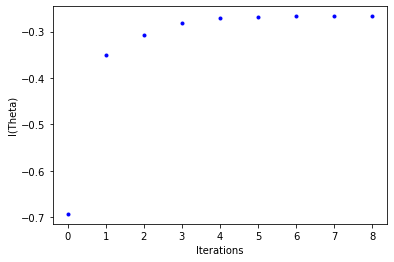

In [190]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history_cubic)),log_l_history_cubic,'b.')

### (b) Plot the computed non-linear boundary and discuss the questions



First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 3.

################# Do not write above this line #################

Your code here

In [225]:
def boundary_function(x1_vec, x2_vec, theta_final):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    if len(theta_final) == 6:
        # boundary function value for features up to quadratic
        c_0, c_1, c_2, c_3, c_4, c_5 = theta_final
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*(x1_vec**2) + c_4*(x2_vec**2) + c_5*x1_vec*x2_vec 
    elif len(theta_final) == 10:
        # boundary function value for features up to cubic
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9 = theta_final
        f = (c_0 + c_1*x1_vec + c_2*x2_vec + c_3*(x1_vec**2) + c_4*(x2_vec**2) + c_5*x1_vec*x2_vec + c_6*(x1_vec**3) + 
             c_7*(x2_vec**3) + c_8*(x1_vec**2)*x2_vec + c_9*x1_vec*(x2_vec**2))
    elif len(theta_final) == 12:
        # boundary function value for features up to tetra
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9, c_10, c_11 = theta_final
        f = (c_0 + c_1*x1_vec + c_2*x2_vec + c_3*(x1_vec**2) + c_4*(x2_vec**2) + c_5*x1_vec*x2_vec + c_6*(x1_vec**3) + 
             c_7*(x2_vec**3) + c_8*(x1_vec**2)*x2_vec + c_9*x1_vec*(x2_vec**2) + c_10*(x1_vec**4) + c_11*(x2_vec**4))
    else:
        raise("Number of Parameters is not correct")
        
    return x1_vec, x2_vec, f

################# Do not write below this line #################

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

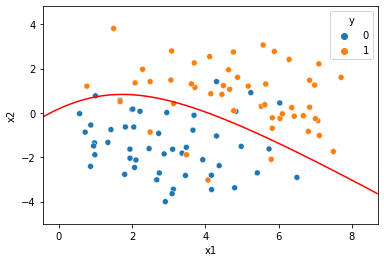

In [226]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

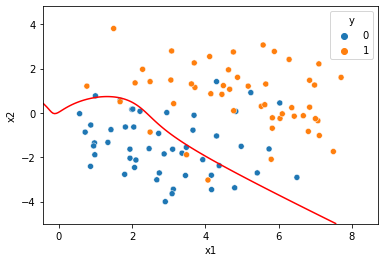

In [227]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

################# Do not write above this line #################

#### If we now use the gradient ascent instead of the newtons method

In [228]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

# Run Newton's method, in case of quadratic features
theta_final_quad, theta_history_quad, log_l_history_quad = gradient_ascent(theta0_quad, x_new_quad, y, G=grad_l, alpha=0.005, iterations=1000)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, theta_history_cubic, log_l_history_cubic = gradient_ascent(theta0_cubic,x_new_cubic,y, G=grad_l, alpha=0.005, iterations=1000)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)

[-1.39810928 -5.81552694  7.85054492  1.51244836 -0.89673691  0.69058293]
[ -0.22163512  -7.59378978   7.2119274  -34.67073139   8.27459625
  13.49462667  15.82542568  20.5664375    4.27466746  -3.58210197]


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


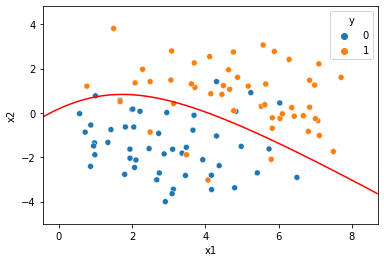

In [229]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

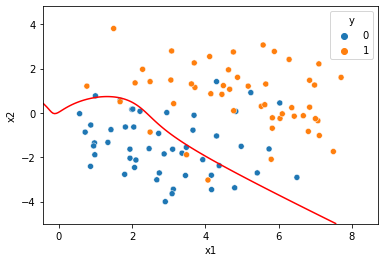

In [230]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

Write now your considerations. Discuss in particular:
- What happens if you further increase the degree of the polynomial. How would the boundary change? Would you incur underfitting or overfitting?

Generally, increasing the degree of your polynomial to fit training data leads to an overfitting of your model (increasing the degree of your function is similar to manually adjusting your model to the training data). If you then apply your overfitted model to rel data (testing data) you might find it have a lot of error since you adjusted your model too much to your training data.

We can try to show this by including another two features ($x_{1}^{4}$ and $x_{2}^{4}$). 


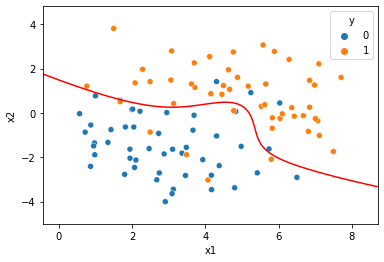

In [231]:
x_new_tetra = np.hstack([x_new_cubic, x1**4, x2**4])

# Define new theta vector
theta0_tetra = np.zeros(x_new_tetra.shape[1])

# Run Newton's method, in case of quadratic features
theta_final_tetra, theta_history_tetra, log_l_history_tetra = newton(theta0_tetra, x_new_tetra, y, grad_l, hess_l, 1e-6)

# Plot Results based on new theta values
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_tetra)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

As we can see from the plot before our boundary function has adjusted in order to correctly classify several new y=0 example data. This might not reflect the $real$ behaviour of the target variable y.

- Look at the boundary of the quadratic and cubic polynomial features. Do they meet your expectations? Why? Consider in particular the classifier decision boundary in areas where there are fewer training data, i.e. where the classifier is supposed to generalize. Hint: Try changing the minimum and maximum limits in vectors x1_vec and x2_vec before plotting the boundaries.

In general the results obtained are not in line with our expectations. We are confident regarding the results obtained for the quadratic boundary function (function with a parabola like shape which seems to classify both classes in a very accurate manner), however the cubic function came as quite a surprise. Several of the data examples for y=0 which were properly classified in the quadratic boundary function are no longer classified correctly when using the cubic boundary function (please bear in mind that this might be an issue in the code).

In order to answer this question in more detail we will first change the limits over which x1_vec and x2_vec range (in one case focussing on more populated parts of the graphs, and secondly focussing on less populated parts of the graph)

##### x1_vec and x2_vec over low populated areas of graph

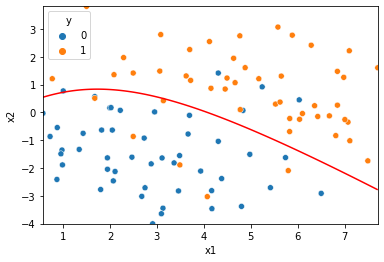

In [238]:
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),200)
x2_vec = np.linspace(df_x_pl["x2"].min(),df_x_pl["x2"].max(),200)

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

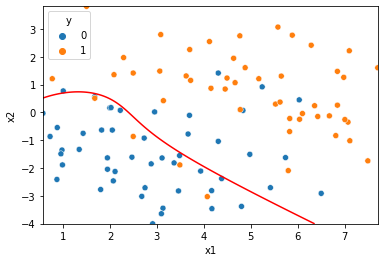

In [239]:
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),200)
x2_vec = np.linspace(df_x_pl["x2"].min(),df_x_pl["x2"].max(),200)

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

- Look at the values of the original features, the 2nd and 3rd degree ones. Do you expect that normalizing the input features (either by setting their range to [-1,1] or by subtracting their mean and dividing by their standard deviation) would improve the classifier? Why yes or why not?

In [276]:
x1_standardized = ((x[:,1] - np.mean(x[:,1]))/np.std(x[:,1])).reshape((99, 1))
x2_standardized = ((x[:,2] - np.mean(x[:,2]))/np.std(x[:,2])).reshape((99, 1))

x_standardized_df = pd.DataFrame(columns=['y', 'x1', 'x2'])
x_standardized_df['y'] = y
x_standardized_df['x1'] = x1_standardized
x_standardized_df['x2'] = x2_standardized

x_standardized = np.hstack([x[:,0].reshape((99, 1)), x1_standardized, x2_standardized])

x_standardized_new_quad = np.hstack([x_standardized, x1_standardized**2, 
                                     x2_standardized**2, x1_standardized*x2_standardized])
x_standardized_new_cubic = np.hstack([x_standardized_new_quad, x1_standardized**3, 
                                      x2_standardized**3, (x1_standardized**2)*x2_standardized, 
                                      x1_standardized*x2_standardized**2])

theta0_quad_standardized = np.zeros(x_standardized_new_quad.shape[1])

# Run Newton's method, in case of quadratic features
theta_final_quad_standardized, _, _ = newton(theta0_quad_standardized, x_standardized_new_quad, y, grad_l, hess_l, 1e-6)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic_standardized = np.zeros(x_standardized_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic_standardized, _, _ = newton(theta0_cubic_standardized,x_standardized_new_cubic,y,grad_l,hess_l,1e-6)

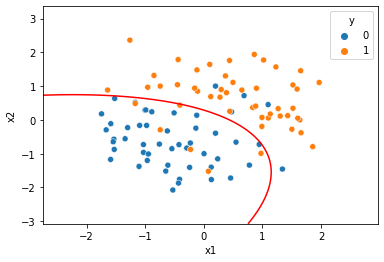

In [277]:
x1_vec = np.linspace(x1_standardized.min()-1,x1_standardized.max()+1,200);
x2_vec = np.linspace(x2_standardized.min()-1,x2_standardized.max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad_standardized)

sns.scatterplot(x="x1", y="x2", hue="y", data=x_standardized_df);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

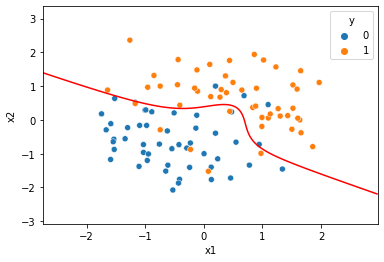

In [275]:
x1_vec = np.linspace(x1_standardized.min()-1,x1_standardized.max()+1,200);
x2_vec = np.linspace(x2_standardized.min()-1,x2_standardized.max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic_standardized)

sns.scatterplot(x="x1", y="x2", hue="y", data=x_standardized_df);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

As one can observe from the two previous plots (in which we have normalized our features), the boundary function seems to have a very similar shape to the case which we did not normalize our data. This is probably due to the fact that the training data was not very far away from the standardized data. If instead we had had very different data (comparing training data before and after standardization), one would observer a higher impact on the final results.

In general it is always recommened to strandardize/normalize data so that all of the feature variables are "comparable".

################# Do not write below this line #################


## [10 points, extra, not compulsory] Question 4: Gaussian Discriminant Analysis



### (a) Review and implement classification with Gradient Discriminant Analysis (GDA)

Recall the assumptions for GDA

$\begin{aligned} y & \sim \operatorname{Bernoulli}(\phi) \\ x \mid y=0 & \sim \mathcal{N}\left(\mu_{0}, \Sigma\right) \\ x \mid y=1 & \sim \mathcal{N}\left(\mu_{1}, \Sigma\right) \end{aligned}$

Recall the probability distributions:

$\begin{aligned} p(y) &=\phi^{y}(1-\phi)^{1-y} \\ p(x \mid y=0) &=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{0}\right)^{T} \Sigma^{-1}\left(x-\mu_{0}\right)\right) \\ p(x \mid y=1) &=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{1}\right)^{T} \Sigma^{-1}\left(x-\mu_{1}\right)\right) \end{aligned}$

Overall, the parameters of the model are $\phi, \Sigma, \mu_{0}$ and $\mu_{1}$ and the log-likelihood is given by:

$\begin{aligned} \ell\left(\phi, \mu_{0}, \mu_{1}, \Sigma\right) &=\log \prod_{i=1}^{n} p\left(x^{(i)}, y^{(i)} ; \phi, \mu_{0}, \mu_{1}, \Sigma\right) \\ &=\log \prod_{i=1}^{n} p\left(x^{(i)} \mid y^{(i)} ; \mu_{0}, \mu_{1}, \Sigma\right) p\left(y^{(i)} ; \phi\right) \end{aligned}$

Parameters may be estimated by maximum likelihood estimate as follows:

$\begin{aligned} \phi &=\frac{1}{n} \sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\} \\ \mu_{0} &=\frac{\sum_{i=1}^{n} 1\left\{y^{(i)}=0\right\} x^{(i)}}{\sum_{i=1}^{n} 1\left\{y^{(i)}=0\right\}} \\ \mu_{1} &=\frac{\sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\} x^{(i)}}{\sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\}} \\ \Sigma &=\frac{1}{n} \sum_{i=1}^{n}\left(x^{(i)}-\mu_{y^{(i)}}\right)\left(x^{(i)}-\mu_{y^{(i)}}\right)^{T} \end{aligned}$

Consider the data variables as from the previous questions, x and y.
For this question, we would select features $x^{(i)}_1$ and $x^{(i)}_2$ into the new varible x12, dropping the $x_0=1$ convention.

In [286]:
# First extract the sole features x1 and x2 from x into an x12 array and reshape it to x2 vector arrays
x12 = x[:,1:]
print(x[:5,:]) # For visualization of the first 5 values
print(x12[:5,:]) # For visualization of the first 5 values
print(y[:5]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[ 1.3432504  -1.3311479 ]
 [ 1.8205529  -0.6346681 ]
 [ 0.98632067 -1.8885762 ]
 [ 1.9443734  -1.635452  ]
 [ 0.97673352 -1.3533151 ]]
[0 0 0 0 0]


Now code up the equations above to learn the GDA parameters from the training data.


################# Do not write above this line #################


Your code here

In [287]:
def compute_phi(y):
    n = len(y)
    x = np.count_nonzero(y==1)/n
    return x

def compute_mu0(x, y):
    n = len(y)
    den = (y == 0).sum()
    partial_sum = 0
    for i in range(0,n):
        if (y[i]==0): 
            partial_sum += x[i]
    return partial_sum/den


def compute_mu1(x, y):
    n = len(y)
    den = (y == 1).sum()
    partial_sum = 0
    for i in range(0,n):
        if (y[i]==1): 
            partial_sum +=  x[i] 
            
    return partial_sum/den


def compute_sigma(x, y, mu0, mu1):
    n = len(y)
    den0 = (y == 0).sum()
    den1 = (y == 1).sum()
    sigma_0 = np.zeros((len(x[0]), len(x[0])))
    sigma_1 = np.zeros((len(x[0]), len(x[0])))
    for i in range(n):
        if y[i] == 0:
            sigma_0 += np.dot((x[i]-mu0).reshape((1, 2)).T,(x[i]-mu0).reshape((1, 2)))
        else:
            sigma_1 += np.dot((x[i]-mu1).reshape((1, 2)).T,(x[i]-mu1).reshape((1, 2)))
    sigma = sigma_0 + sigma_1
    return sigma


# computing p(x|y) for the Bayes rule
def p_x_given_y(x, mu, sigma):
    dim = 2
    det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    res = (1/(2*np.pi)**(dim/2)*np.sqrt(det)*np.exp(-0.5*np.dot(np.dot((x-mu).reshape((1, 2)),sigma_inv),(x-mu).reshape((1, 2)).T)))
    return res[0][0]


################# Do not write below this line #################


In [288]:
# Support functions

# Function p(y) for applying the Bayes rule
def p_y(y,phi):
    if y==1: return phi
    else: return 1-phi

In [289]:
# Now estimate the GDA parameters
phi = compute_phi(y)
mu0 = compute_mu0(x12,y)
mu1 = compute_mu1(x12,y)
sigma = compute_sigma(x12, y, mu0, mu1)

phi,mu0,mu1,sigma

(0.494949494949495,
 array([ 2.93068144, -1.44476469]),
 array([4.93616668, 0.76771897]),
 array([[265.49277586, -45.94001206],
        [-45.94001206, 186.48414319]]))

Now that we know both the distributions of $p(y)$ and $p(x|y)$, we may estimate the posterior probability for an input $x$ via Bayes Rule:

\begin{equation}
p(y \mid x)=\frac{p(x \mid y) p(y)}{p(x)}
\end{equation}
where $p(x)$ is the same for both classes and may be disregarded.

This is used to classify each data point, by comparing $p(y=1|x) \propto p(x \mid y=1) p(y=1)$ and $p(y=0|x) \propto p(x \mid y=0) p(y=0)$.

In [290]:
selected_example=1
print('Selected example =', x12[selected_example,:])

# compute p(y=0|x) ~ p(x|y=0)*p(y=0)  &  p(y=1|x) ~ p(x|y=1)*p(y=1)

# y=0
print('p(y=0|x) ~', p_x_given_y(x12[selected_example,:],mu0,sigma)*p_y(0,phi))

# y=1
print('p(y=1|x) ~', p_x_given_y(x12[selected_example,:],mu1,sigma)*p_y(1,phi))

Selected example = [ 1.8205529 -0.6346681]
p(y=0|x) ~ 17.440955513812025
p(y=1|x) ~ 16.662676656260853


### (b) Plot the estimated likelihood functions, the decision boundary and write your remarks


In [291]:
def boundary_gda(x1_vec, x2_vec, mu0, mu1, sigma, phi):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    f=np.zeros(x1_vec.shape)
    
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            x12_ij = np.array( (x1_vec[i,j],x2_vec[i,j]) )
            f[i,j] = p_x_given_y(x12_ij,mu1,sigma)*p_y(1,phi) - p_x_given_y(x12_ij,mu0,sigma)*p_y(0,phi)
            
    return x1_vec, x2_vec, f


x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_gda(x1_vec, x2_vec, mu0, mu1, sigma, phi)

(-0.42920059, 8.705400599999999)

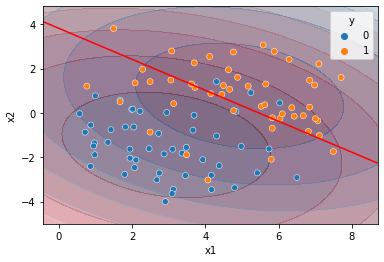

In [292]:
from matplotlib import cm
from scipy.stats import multivariate_normal

# Define Gaussian pdfs
rv0 = multivariate_normal(mu0, sigma)
rv1 = multivariate_normal(mu1, sigma)

pairx12 = np.dstack((x1_vec, x2_vec))

# plot pdf contours
plt.contourf(x1_vec, x2_vec, rv0.pdf(pairx12),alpha=0.5,cmap=cm.Reds)
plt.contourf(x1_vec, x2_vec, rv1.pdf(pairx12),alpha=0.35,cmap=cm.Blues)

# Add the GDA classification to the plot
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);
plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

plt.ylim(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1)
plt.xlim(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1)

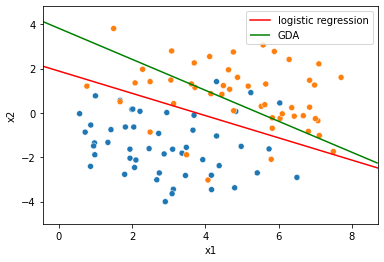

In [293]:
# For comparison with the Logistic Regression boundary

# Generate vector to plot decision boundary
x1vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,2)

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl)

# Plot decision boundary
log, = plt.plot(x1vec,(-x1vec*theta_GA[1]-theta_GA[0])/theta_GA[2], color="red")
gda = plt.contour(x1_vec, x2_vec, f, colors="green", levels=[0])

plt.legend([log, gda.collections[0]],['logistic regression','GDA'])

plt.ylim(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1)
plt.xlim(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1)

# plt.legend()
plt.show()

Write now your considerations. Discuss in particular:
- Gaussian Discriminant Analysis makes stronger modelling assumptions than logistic regression. When may this be helpful and where may this be harmful?

The approach of learning to distinguish and classify in a binary way, based on the two classes (y=1) and (y=0), can also be implemented with GDA.   
So if we have two classes, which in our case correspond to (y=0) and (y=1), our aim is to construct a model that, for each class, is able to recognise new elements and assign it to one of the two class.     
In this method, instead of p(y|x) used for the logistic regression, p(x|y) and p(y) are modelled.
Once known p(x|y) and p(y) we are able to understand p(y|x), using the Bayes rule. 
In our classification problem, using GDA, the input features are continuous random variables and, as we have seen, p(x|y) is distributed as a multivariate normal distribution and p(y) is distributed as a Bernoulli.
From the analysis of the plot showing the two boundary decisions with GDA and LR, we can say that for this particular data training LR works better than GDA, even if the results are not totally inconsistent.
The explanation for this different behaviour lies in the fact that GDA makes more specific assumptions than the LR, in particular considering p(x|y) and  p(y).
These conditions, if they are true , allows GDA to work better than the LR, but we can observe 
from the contour plots that our training set does not completely overlap whith the assumption that p(x|y) is guassian.
So the GDA assumptions are not completely verified.   
In conclusion, we can say that GDA has better results than the LR if we know the nature of our data and their distribution matches the specific assumptions of this model. 
As we have seen, if this aspect is neglected, we lose accuracy. 
On the other hand, the LR model does not need restrictive assumptions like GDA and works better in situations where the probability distribution of the features is not Gaussian.

Credits for material: Andrew Ng, C. Combier